In [ ]:
!pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 4.3 MB/s 
     |████████████████████████████████| 462 kB 8.9 MB/s 


In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Data_test.xlsx to Data_test.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['Data_test.xlsx']))
df.head(5)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I‚Äôm so lostHello, my name is Adam (16) and I...",suicide


In [ ]:
df['suicide']=df['class'].apply(lambda x: 1 if x=='suicide' else 0)
df.head()

,text,class,suicide
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,Am I weird I don't get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,i need helpjust help me im crying so hard,suicide,1
4,"I‚Äôm so lostHello, my name is Adam (16) and I...",suicide,1


In [ ]:
###Drop Nan Values
df=df.dropna()

In [ ]:
## Get the Independent Features

X=df.drop('suicide',axis=1)

In [ ]:
## Get the Dependent features
y=df['suicide']

In [ ]:
X.shape
y.shape
tf.__version__

'2.8.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
messages=X.copy()

In [ ]:
messages['text'][1]
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
43910
43911
43912
43913
43914
43915
43916
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
4

In [ ]:
print(corpus)

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[1140,
  1859,
  4203,
  2672,
  3152,
  1859,
  2261,
  4411,
  2762,
  3241,
  1116,
  1532,
  201,
  1963,
  3338,
  582,
  176,
  2001,
  4203,
  4943,
  808,
  423,
  2803,
  582,
  3867,
  720,
  1918,
  4457,
  2666,
  4452,
  3338,
  133,
  2270,
  4144,
  4203,
  2848,
  3847,
  3289,
  2031,
  3277,
  1587,
  4986,
  4186,
  2557,
  2549,
  4893,
  1859,
  1611,
  451,
  3847,
  4411,
  3209,
  3244,
  1732,
  4782,
  2178,
  2804,
  582,
  4500,
  1116,
  2031],
 [2402, 3847, 2187, 1132, 4452, 1177, 133, 4186, 3244, 3277, 2261, 3443, 3844],
 [3417, 1065, 1509, 950, 80, 1065, 4145, 2618, 17, 1304, 3048, 3231, 121],
 [827, 4285, 3754, 219, 4370, 1462],
 [1946,
  3263,
  3250,
  3114,
  1229,
  2618,
  1004,
  2232,
  2618,
  4083,
  4943,
  4860,
  3268,
  3937,
  754,
  3794,
  1568,
  4700,
  4452,
  4141,
  3244,
  1397,
  2618,
  176,
  4782,
  694,
  2041,
  1993,
  3244,
  1103,
  4279,
  850,
  4027,
  1970,
  2237,
  1225,
  4083,
  2621,
  2103,
  3719,
  1225,
  216

In [ ]:
onehot_repr[0]

In [ ]:
sent_length=100
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4500 1116 2031]
 [   0    0    0 ... 2261 3443 3844]
 [   0    0    0 ... 3048 3231  121]
 ...
 [   0    0    0 ... 3353 3417 1157]
 [   0    0    0 ... 2870 3488  129]
 [   0    0    0 ... 1811 4500  223]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1140, 1859, 4203, 2672, 3152,
       1859, 2261, 4411, 2762, 3241, 1116, 1532,  201, 1963, 3338,  582,
        176, 2001, 4203, 4943,  808,  423, 2803,  582, 3867,  720, 1918,
       4457, 2666, 4452, 3338,  133, 2270, 4144, 4203, 2848, 3847, 3289,
       2031, 3277, 1587, 4986, 4186, 2557, 2549, 4893, 1859, 1611,  451,
       3847, 4411, 3209, 3244, 1732, 4782, 2178, 2804,  582, 4500, 1116,
       2031], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(200))
model.add(Dropout(0.7))
model.add(keras.layers.Dense(64, activation='sigmoid'))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 40)           200000    
                                                                 
 lstm_23 (LSTM)              (None, 200)               192800    
                                                                 
 dropout_23 (Dropout)        (None, 200)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                12864     
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 405,729
Trainable params: 405,729
Non-t

In [ ]:
len(embedded_docs),y.shape

(48910, (48910,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape


((48910, 100), (48910,))

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
### Finally Training
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=12)

Epoch 1/10
3261/3261 [==============================] - 33s 9ms/step - loss: 0.5058 - accuracy: 0.7387 - val_loss: 0.2789 - val_accuracy: 0.8956
Epoch 2/10
3261/3261 [==============================] - 28s 8ms/step - loss: 0.3328 - accuracy: 0.8755 - val_loss: 0.2448 - val_accuracy: 0.9103
Epoch 3/10
3261/3261 [==============================] - 27s 8ms/step - loss: 0.2397 - accuracy: 0.9164 - val_loss: 0.2440 - val_accuracy: 0.9114
Epoch 4/10
3261/3261 [==============================] - 31s 10ms/step - loss: 0.2518 - accuracy: 0.9093 - val_loss: 0.2380 - val_accuracy: 0.9120
Epoch 5/10
3261/3261 [==============================] - 27s 8ms/step - loss: 0.2163 - accuracy: 0.9253 - val_loss: 0.2352 - val_accuracy: 0.9118
Epoch 6/10
3261/3261 [==============================] - 31s 9ms/step - loss: 0.1997 - accuracy: 0.9317 - val_loss: 0.2468 - val_accuracy: 0.9122
Epoch 7/10
3261/3261 [==============================] - 27s 8ms/step - loss: 0.1916 - accuracy: 0.9348 - val_loss: 0.2341 - val_a

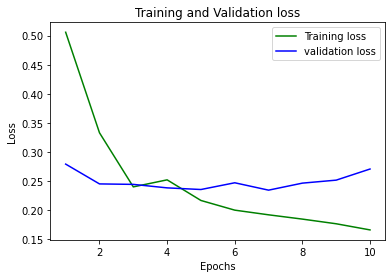

In [ ]:
import matplotlib.pyplot as plt
 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

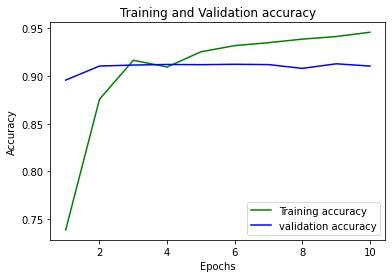

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.910345532610918

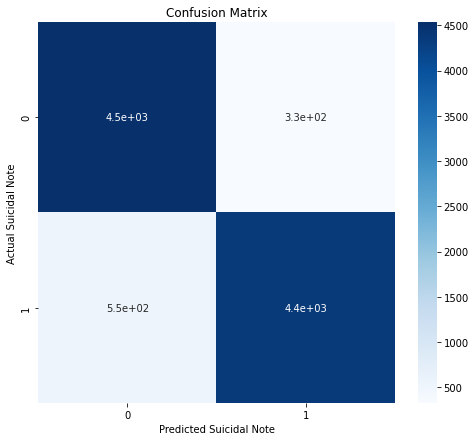

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plotting the confusion matrix
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Suicidal Note')
plt.xlabel('Predicted Suicidal Note')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4862
           1       0.93      0.89      0.91      4920

    accuracy                           0.91      9782
   macro avg       0.91      0.91      0.91      9782
weighted avg       0.91      0.91      0.91      9782

